In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

case = 'sin23_45'
master_dic = case+'/profile_LL_files/'


tag_to_name = {
    'Nominal': 'Nominal',
    'FDS_A':  'Stat',
    'FDS_B':  '0-10deg',
    'FDS_D':  '30-0deg',
    #'FDS_E':  '0-20deg',
    #'FDS_G':  '0.5-30deg',
    'FDS_I':  '0.1-10deg',
    'FDS_H':  '0.2-10deg',
    'FDS_F':  '30-10deg',
    'FDS_C':  '0-20deg',
    'FDS_J':  '0.3-20deg',
}

name_mapping = {
    'Nominal': 'HK Nominal',
    'FDS_A': 'HK Stats.',
    'FDS_B': 'E$_{0\%}$  \\& 10$^\circ$',
    'FDS_C': 'E$_{0\%}$  \\& 20$^\circ$',
    'FDS_D': 'E$_{30\%}$ \\& 0$^\circ$',
    #'FDS_E': 'E$_{50\%}$ \\& 0$^\circ$',
    'FDS_F': 'E$_{30\%}$ \\& 10$^\circ$',
    #'FDS_G': 'E$_{50\%}$ \\& 20$^\circ$',
    'FDS_H': 'E$_{20\%}$ \\& 10$^\circ$',
    'FDS_I': 'E$_{10\%}$ \\& 10$^\circ$',
    'FDS_J': 'E$_{30\%}$ \\& 20$^\circ$'
}




tags = ['Nominal']
param_list = ['kappa_OC', 'kappa_IM', 'kappa_OM']

det_name = ['HK']

dfs = []
missing_names = []
for p_name in param_list:
    for det in det_name:
        for tag in tags:
            fname = master_dic+det+'_'+tag+'_'+p_name+'_1D.csv'
            print(fname)
            if os.path.exists(fname):
                dfs.append(pd.read_csv(fname))
            else:
                missing_names.append(fname)

print('missing files: ', missing_names)

sin23_45/profile_LL_files/HK_Nominal_kappa_OC_1D.csv
sin23_45/profile_LL_files/HK_Nominal_kappa_IM_1D.csv
sin23_45/profile_LL_files/HK_Nominal_kappa_OM_1D.csv
missing files:  []


Missing files for HK_Nominal:  []
Missing files for SK_Nominal:  []
Missing files for HK_FDS_A:  []
Missing files for HK_FDS_B:  []
Missing files for HK_FDS_D:  []
Missing files for HK_FDS_I:  []
Missing files for HK_FDS_H:  []
Missing files for HK_FDS_F:  []
Missing files for HK_FDS_C:  []
Missing files for HK_FDS_J:  []


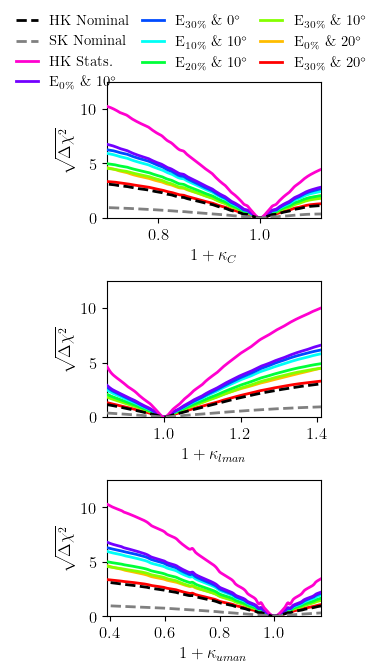

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.interpolate import PchipInterpolator
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# Dictionary to map the original names to the new names
name_mapping = {
    'Nominal': 'HK Nominal',
    'FDS_A': 'HK Stats.',
    'FDS_B': 'E$_{0\%}$  \\& 10$^\circ$',
    'FDS_C': 'E$_{0\%}$  \\& 20$^\circ$',
    'FDS_D': 'E$_{30\%}$ \\& 0$^\circ$',
    #'FDS_E': 'E$_{50\%}$ \\& 0$^\circ$',
    'FDS_F': 'E$_{30\%}$ \\& 10$^\circ$',
    #'FDS_G': 'E$_{50\%}$ \\& 20$^\circ$',
    'FDS_H': 'E$_{20\%}$ \\& 10$^\circ$',
    'FDS_I': 'E$_{10\%}$ \\& 10$^\circ$',
    'FDS_J': 'E$_{30\%}$ \\& 20$^\circ$'
}


param_list = ['kappa_OC', 'kappa_IM', 'kappa_OM']
det_name = ['HK', 'SK']

def load_dataframes(tag, detector):
    dfs = []
    missing_names = []
    for p_name in param_list:
        fname = f"{master_dic}{detector}_{tag}_{p_name}_1D.csv"
        if os.path.exists(fname):
            dfs.append(pd.read_csv(fname))
        else:
            missing_names.append(fname)
    print(f'Missing files for {detector}_{tag}: ', missing_names)
    return dfs

def calculate_ABCL(dfs):
    A = np.round(np.array(list(dfs[0].OCk) + list(dfs[1].OCk) + list(dfs[2].OCk)), decimals=4)
    B = np.round(np.array(list(dfs[0].IMk) + list(dfs[1].IMk) + list(dfs[2].IMk)), decimals=4)
    C = np.round(np.array(list(dfs[0].OMk) + list(dfs[1].OMk) + list(dfs[2].OMk)), decimals=4)
    L = np.sqrt(np.round(np.array(list(dfs[0].chi2) + list(dfs[1].chi2) + list(dfs[2].chi2)), decimals=4))

    A = A[np.where(L<20)]
    B = B[np.where(L<20)]
    C = C[np.where(L<20)]
    L = L[np.where(L<20)]

    return A, B, C, L

# def find_intersections(x, y, label, target_value=1):
#     sorted_indices = np.argsort(x)
#     x_sorted = x[sorted_indices]
#     y_sorted = y[sorted_indices]
#     x_vals = []
#     y_vals = []
#     for i, x in enumerate(np.round(x_sorted, decimals=4)):
#         if x not in x_vals:
#             x_vals.append(x)
#             y_vals.append(y_sorted[i])
#     x_sorted = x_vals
#     y_sorted = y_vals
#     interpolator = PchipInterpolator(x_sorted, y_sorted)
    
#     def f(x):
#         return interpolator(x) - target_value
    
#     intersections = []
#     for i in range(len(x_sorted) - 1):
#         x_left, x_right = x_sorted[i], x_sorted[i+1]
#         y_left, y_right = y_sorted[i], y_sorted[i+1]
        
#         if (y_left - target_value) * (y_right - target_value) <= 0:
#             try:
#                 root = brentq(f, x_left, x_right)
#                 intersections.append(root)
#             except ValueError:
#                 pass
    
#     return label, intersections, interpolator, x_sorted, y_sorted


def find_intersections(x, y, label, target_value=1):
    # Sort and remove duplicates
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    x_vals = []
    y_vals = []
    for i, x in enumerate(np.round(x_sorted, decimals=4)):
        if x not in x_vals:
            x_vals.append(x)
            y_vals.append(y_sorted[i])
    x_sorted = x_vals
    y_sorted = y_vals
    
    # First try with PCHIP
    interpolator = PchipInterpolator(x_sorted, y_sorted)
    
    def f(x):
        return interpolator(x) - target_value
    
    intersections = []
    for i in range(len(x_sorted) - 1):
        x_left, x_right = x_sorted[i], x_sorted[i+1]
        y_left, y_right = y_sorted[i], y_sorted[i+1]
        
        if (y_left - target_value) * (y_right - target_value) <= 0:
            try:
                root = brentq(f, x_left, x_right)
                intersections.append(root)
            except ValueError:
                pass
    
    # If no intersections found, try linear interpolation
    #print(intersections)
    if len(intersections)==0:

        x_sorted = np.array(x_sorted)
        y_sorted = np.array(y_sorted)
        indices  = x_sorted<1
        linear_interpolator = interp1d(x_sorted [indices], y_sorted [indices]**2, kind='linear',  fill_value="extrapolate")

        x = np.linspace(0.,0.99,1000)
        solution = np.argmin([abs(linear_interpolator(x_i)-target_value**2) for x_i in x])
        if x[solution]>0.1:
            intersections.append('*'+str(x[solution]))
        #print(x[solution])

        indices  = x_sorted>1
        linear_interpolator = interp1d(x_sorted [indices], y_sorted [indices]**2, kind='linear',  fill_value="extrapolate")

        x = np.linspace(1.01,2.0,1000)
        solution = np.argmin([abs(linear_interpolator(x_i)-target_value**2) for x_i in x])

        if x[solution]<1.9:
            intersections.append('*'+str(x[solution]))
    
        #print(x[solution])
        # print(intersections)

    elif len(intersections)==1:
        x_sorted = np.array(x_sorted)
        y_sorted = np.array(y_sorted)
        if intersections[0]>1:

            indices  = x_sorted<1
            linear_interpolator = interp1d(x_sorted [indices], y_sorted [indices]**2, kind='linear',  fill_value="extrapolate")
    
            x = np.linspace(0.,0.99,1000)
            solution = np.argmin([abs(linear_interpolator(x_i)-target_value**2) for x_i in x])
            if x[solution]>0.1:
                intersections.append('*'+str(x[solution]))

        else:
            indices  = x_sorted>1
            linear_interpolator = interp1d(x_sorted [indices], y_sorted [indices]**2, kind='linear',  fill_value="extrapolate")
    
            x = np.linspace(1.01,2.0,1000)
            solution = np.argmin([abs(linear_interpolator(x_i)-target_value**2) for x_i in x])
    
            if x[solution]<1.9:
                intersections.append('*'+str(x[solution]))

    

    # Return original PCHIP results if intersections were found, or linear results if none were found
    return label, intersections, interpolator, x_sorted, y_sorted



# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4/1.3, 8/1.3))
subplots = [ax1, ax2, ax3]
x_labels = ['$1+\\kappa_{C}$', '$1+\\kappa_{lman}$', '$1+\\kappa_{uman}$']

# sin23_45Results, sin23_50Results and sin23_58 Results to  change 
# \kappa_{CORE} to (1+\kappa_C),   
#  \kappa_{Inner Mantle} to (1+ \kappa_{lman})      and
# \kappa_{Upper Mantle} to \kappa_{uman}

# Color cycle for different tags
colors = plt.cm.hsv(np.linspace(0., 1., len(tag_to_name)))  # +1 for SK Nominal


#colors = ['gray', 'k'] + colors

results_one_sigma = {}
results_two_sigma = {}
results_ninty_pcent = {}


for i, (tag, name) in enumerate(tag_to_name.items()):
    for detector in det_name:
        if detector == 'SK':
            if tag != 'Nominal':
                continue
        
        dfs = load_dataframes(tag, detector)
        if not dfs:
            print(f"No data found for {detector}_{tag}")
            continue
        
        A, B, C, L = calculate_ABCL(dfs)
        data_sets = [(A, L, 'A'), (B, L, 'B'), (C, L, 'C')]

        one_sigma_dic = {}
        two_sigma_dic = {}
        ninty_pcent_dic = {}
        for j, ((x, y, label), ax) in enumerate(zip(data_sets, subplots)):
            _, one_sigma, interpolator, x_sorted, y_sorted = find_intersections(x, y, label, 1)
            _, two_sigma, interpolator, x_sorted, y_sorted = find_intersections(x, y, label, 2)
            _, ninty_pcent, interpolator, x_sorted, y_sorted = find_intersections(x, y, label, 1.645)

            
            c = colors[len(colors)-1-i]
            if tag == 'Nominal' and detector == 'SK':
                c = 'gray'
            elif tag == 'Nominal' and detector == 'HK':
                c = 'black'
            
            # Plot scatter points and spline with a single legend entry
            #ax.scatter(x, y, color=c, alpha=1, s=5, zorder=99-i)
            
            x_smooth = np.linspace(min(x), max(x), 1000)
            y_smooth = interpolator(x_smooth)
            
            # Use name_mapping for the legend
            legend_name = name_mapping.get(tag, tag)
            if detector == 'SK':
                legend_name = legend_name.replace('HK', 'SK')

            one_sigma_dic[label] = one_sigma
            two_sigma_dic[label] = two_sigma
            ninty_pcent_dic[label] = ninty_pcent
            lstyle = '-' #if i%2==0 else ':'
            lstyle = '-' if tag!='Nominal' else '--'
            ax.plot(x_smooth, y_smooth, color=c, label=legend_name, lw=2, alpha=1, zorder=100-i, linestyle=lstyle)
            
            ax.set_xlabel(x_labels[j])
            ax.set_ylabel('$\\sqrt{\\Delta \\chi^2}$')

        results_one_sigma[legend_name] = one_sigma_dic
        results_two_sigma[legend_name] = two_sigma_dic
        results_ninty_pcent[legend_name] = ninty_pcent_dic

# Set up the legend
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, frameon=False, handlelength=1.5,  columnspacing=0.8, fontsize=10.5)

subplots[0].set_xlim(0.7,1.12)
subplots[1].set_xlim(0.85,1.41)
subplots[2].set_xlim(0.39,1.17)

subplots[0].set_ylim(0.,12.5)
subplots[1].set_ylim(0.,12.5)
subplots[2].set_ylim(0.,12.5)

# subplots[0].set_ylim(0.,1.5)
# subplots[1].set_ylim(0.,1.5)
# subplots[2].set_ylim(0.,1.5)

plt.tight_layout()
#plt.subplots_adjust(top=0.9)  # Adjust this value to make room for the legend
plt.savefig(case+'Results.pdf', bbox_inches='tight')
plt.show()

In [3]:
results_one_sigma

{'HK Nominal': {'A': [0.9216214287536776, 1.0895540517557545],
  'B': [0.8725632774877661, 1.110532592090483],
  'C': [0.8439891173033118, 1.184087746701994]},
 'SK Nominal': {'A': ['*0.6728828828828829'],
  'B': ['*0.2764864864864865', '*1.458918918918919'],
  'C': ['*0.3458558558558559', '*1.785945945945946']},
 'HK Stats.': {'A': [0.9775692945319561, 1.0225646858648412],
  'B': [0.9690904995120332, 1.0331848672334931],
  'C': [0.9575503905655489, 1.0427116524467737]},
 'E$_{0\\%}$  \\& 10$^\\circ$': {'A': [0.9631724302865259, 1.03758209959147],
  'B': [0.9498567476281293, 1.0489430689408386],
  'C': [0.9323826689969529, 1.0688621847631934]},
 'E$_{30\\%}$ \\& 0$^\\circ$': {'A': [0.960615655642436, 1.0401789869600293],
  'B': [0.9454247566040195, 1.053006858358712],
  'C': [0.9269617119031449, 1.0750350825949735]},
 'E$_{10\\%}$ \\& 10$^\\circ$': {'A': [0.9588555942396588, 1.042720618388964],
  'B': [0.9413050442077873, 1.0558318624740626],
  'C': [0.9222522984506722, 1.0825616462597

In [4]:
results_two_sigma

{'HK Nominal': {'A': [0.8342049944379217, '*1.6194594594594593'],
  'B': [1.2281421212153092, '*0.6540540540540541'],
  'C': [0.6705072668066561, '*1.3964864864864865']},
 'SK Nominal': {'A': [], 'B': [], 'C': []},
 'HK Stats.': {'A': [0.9532431503897563, 1.0479006711026457],
  'B': [0.9338199732913436, 1.06444399925324],
  'C': [0.9060794925883476, 1.096352263191102]},
 'E$_{0\\%}$  \\& 10$^\\circ$': {'A': [0.9297588116482515, 1.0747218495615363],
  'B': [0.8940207154401525, 1.1016424416050536],
  'C': [0.8544855841846575, 1.1496099553215]},
 'E$_{30\\%}$ \\& 0$^\\circ$': {'A': [0.9235706665359309, 1.0792894971770193],
  'B': [0.8876061370403924, 1.10795488919839],
  'C': [0.8476850287935352, 1.1592361372677744]},
 'E$_{10\\%}$ \\& 10$^\\circ$': {'A': [0.9194464976745753, 1.0859976765946975],
  'B': [0.8769518524433056, 1.11364983022249],
  'C': [0.8389692219483941, 1.1785367889495761]},
 'E$_{20\\%}$ \\& 10$^\\circ$': {'A': [0.9077736689959179, 1.1134891310846569],
  'B': [0.85508114

(array(0.69296465), array(0.64039051))

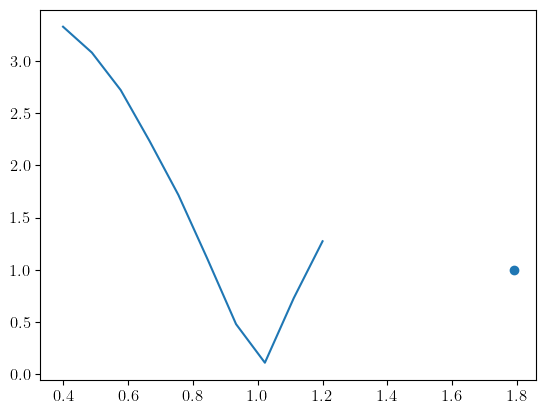

In [5]:
x = np.linspace(0.4,1.2,10)
y = interpolator(x)
plt.plot(x,y)

plt.scatter(1.79, 1)

interpolator(0.9), interpolator(1.1)

In [6]:
import numpy as np

def generate_table_content(results_one_sigma, results_two_sigma):
    table_content = ""
    for model in results_one_sigma.keys():
        row = [model]
        for param in ['A', 'B', 'C']:
            one_sigma = results_one_sigma[model][param]
            two_sigma = results_two_sigma[model][param]
            
            for sigma in [one_sigma, two_sigma]:
                if len(sigma) == 2:
                    lower, upper = sigma
                    if '*' not in str(lower) and  '*' not in str(upper):
                        row.extend([f"{lower:.3f}", f"{upper:.3f}"])
                    else:
                        if '*' in str(lower):
                            lower = float(lower.strip('*'))
                        if '*' in str(upper):
                            upper = float(upper.strip('*'))
                        row.extend([f"*{lower:.3f}", f"*{upper:.3f}"])
                # else:
                #     row.extend(["-", "-"])
                elif len(sigma) == 1:
                    print('AAAH', sigma)
                    value = sigma[0]
                    if '*' not in str(value):
                        if value < 1:
                            row.extend([f"{value:.3f}", "-"])
                        else:
                            row.extend(["-", f"{value:.3f}"])
                    else:
                        value = float(value.strip('*'))
                        if value < 1:
                            row.extend([f"*{value:.3f}", "-"])
                        else:
                            row.extend(["-", f"*{value:.3f}"])

                else:
                    row.extend(["-", "-"])
        
        table_content += " & ".join(row) + " \\\\\n"
    
    return table_content

# Generate the table content
table_content = generate_table_content(results_one_sigma, results_two_sigma)

# Create the full LaTeX table
comprehensive_latex_table = f"""
\\begin{{table*}}[htbp]
\\centering
\\resizebox{{\\textwidth}}{{!}}{{
\\begin{{tabular}}{{|p{{2.2cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|C{{0.8cm}}|}}
\\hline\\hline
& \\multicolumn{{4}}{{c|}}{{Core (C)}} & \\multicolumn{{4}}{{c|}}{{Inner Mantle (IM)}} & \\multicolumn{{4}}{{c|}}{{Outer Mantle (OM)}} \\\\
\\hline
& \\multicolumn{{2}}{{c|}}{{68\\%}} & \\multicolumn{{2}}{{c|}}{{95\\%}} & \\multicolumn{{2}}{{c|}}{{68\\%}} & \\multicolumn{{2}}{{c|}}{{95\\%}} & \\multicolumn{{2}}{{c|}}{{68\\%}} & \\multicolumn{{2}}{{c|}}{{95\\%}} \\\\
\\hline
Model & lower & upper & lower & upper & lower & upper & lower & upper & lower & upper & lower & upper \\\\
\\hline
{table_content}
\\hline\\hline
\\end{{tabular}}
}}
\\caption{{Lower and upper limits for Core (C), Inner Mantle (IM), and Outer Mantle (OM) expressed as factors of their nominal values corresponding to unity. Dashes indicate the limit is given by the Earth model conservations.}}
\\label{{tab:comprehensive_summary}}
\\end{{table*}}
"""

print(comprehensive_latex_table)

AAAH ['*0.6728828828828829']

\begin{table*}[htbp]
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{|p{2.2cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|C{0.8cm}|}
\hline\hline
& \multicolumn{4}{c|}{Core (C)} & \multicolumn{4}{c|}{Inner Mantle (IM)} & \multicolumn{4}{c|}{Outer Mantle (OM)} \\
\hline
& \multicolumn{2}{c|}{68\%} & \multicolumn{2}{c|}{95\%} & \multicolumn{2}{c|}{68\%} & \multicolumn{2}{c|}{95\%} & \multicolumn{2}{c|}{68\%} & \multicolumn{2}{c|}{95\%} \\
\hline
Model & lower & upper & lower & upper & lower & upper & lower & upper & lower & upper & lower & upper \\
\hline
HK Nominal & 0.922 & 1.090 & *0.834 & *1.619 & 0.873 & 1.111 & *1.228 & *0.654 & 0.844 & 1.184 & *0.671 & *1.396 \\
SK Nominal & *0.673 & - & - & - & *0.276 & *1.459 & - & - & *0.346 & *1.786 & - & - \\
HK Stats. & 0.978 & 1.023 & 0.953 & 1.048 & 0.969 & 1.033 & 0.934 & 1.064 & 0.958 & 1.043 & 0.906 & 1.096 \\
E$_{0\%}$  \& 10$^\circ$ & 0.963 & 1

In [7]:
import yaml
from app import *
from core.earthModel import *

Welcome to JupyROOT 6.30/02


In [8]:
config_file='/Users/cjesus/Documents/HKnuTomo/config/chi2_config.yaml'
with open(config_file,'r') as f:
    cfg=yaml.safe_load(f)

earth = EarthModel(cfg, None, None)

In [9]:
results_one_sigma

{'HK Nominal': {'A': [0.9216214287536776, 1.0895540517557545],
  'B': [0.8725632774877661, 1.110532592090483],
  'C': [0.8439891173033118, 1.184087746701994]},
 'SK Nominal': {'A': ['*0.6728828828828829'],
  'B': ['*0.2764864864864865', '*1.458918918918919'],
  'C': ['*0.3458558558558559', '*1.785945945945946']},
 'HK Stats.': {'A': [0.9775692945319561, 1.0225646858648412],
  'B': [0.9690904995120332, 1.0331848672334931],
  'C': [0.9575503905655489, 1.0427116524467737]},
 'E$_{0\\%}$  \\& 10$^\\circ$': {'A': [0.9631724302865259, 1.03758209959147],
  'B': [0.9498567476281293, 1.0489430689408386],
  'C': [0.9323826689969529, 1.0688621847631934]},
 'E$_{30\\%}$ \\& 0$^\\circ$': {'A': [0.960615655642436, 1.0401789869600293],
  'B': [0.9454247566040195, 1.053006858358712],
  'C': [0.9269617119031449, 1.0750350825949735]},
 'E$_{10\\%}$ \\& 10$^\\circ$': {'A': [0.9588555942396588, 1.042720618388964],
  'B': [0.9413050442077873, 1.0558318624740626],
  'C': [0.9222522984506722, 1.0825616462597

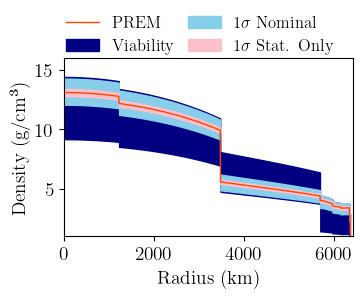

In [10]:
plt.rcParams['font.size'] = 14

data_name = 'HK Nominal'
conditions = [
    {
        'label': '$1\sigma$ Nominal',
        'color': 'skyblue',
        'IC': results_one_sigma[data_name]['A'],
        'OC': results_one_sigma[data_name]['A'],
        'IM': results_one_sigma[data_name]['B'],
        'OM': results_one_sigma[data_name]['C']
    },
    {
        'label': '$1\sigma$ Stat. Only',
        'color': 'pink',
        'IC': results_one_sigma['HK Stats.']['A'],
        'OC': results_one_sigma['HK Stats.']['A'],
        'IM': results_one_sigma['HK Stats.']['B'],
        'OM': results_one_sigma['HK Stats.']['C']
    }
]

figname = case+'EarthProfileResults.pdf'
earth.plot_results(show_viability=True, conditions=conditions, figname=figname, viability_c='navy')

In [11]:
#print(results_one_sigma['HK Nominal']['A'])
print(results_one_sigma['HK Nominal']['A'])
print(results_one_sigma['HK Nominal']['B'])
print(results_one_sigma['HK Nominal']['C'])

[0.9216214287536776, 1.0895540517557545]
[0.8725632774877661, 1.110532592090483]
[0.8439891173033118, 1.184087746701994]
